In [1]:
from functions import *

In [44]:
linewidth=0.15
markersize=3

In [35]:
n = 7
T = 1
show_ticks = False
m = RandomIsingModel(n, seed=2)

In [36]:
T = 1
show_ticks = False
m = RandomIsingModel(n, seed=2)

# Lexicographic order

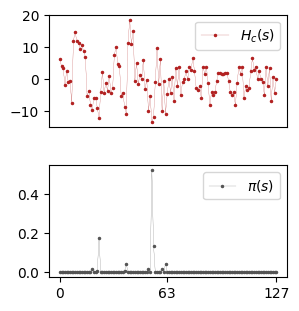

In [59]:
x = [int_to_bin(i, n) for i in range(2**n)]
boltzmann = np.exp(-m.E / T) / sum(np.exp(-m.E / T))

fig = plt.figure(figsize=(figure_size_x/2, figure_size_y*1.2))

plt.subplot(311)
plt.plot(x, m.E, 
         '.-', 
         linewidth=linewidth, 
         markersize=markersize,
         color=red, 
         label='$H_c(s)$')
if show_ticks:
    plt.xticks(rotation=70)
else: 
    plt.xticks([])
# plt.yticks([-20,0,20])
plt.legend()

plt.subplot(312)
plt.plot(x, boltzmann, 
         '.-', 
         linewidth=linewidth, 
         markersize=markersize,
         color=dark_grey, 
         label='$\pi(s)$')
# if show_ticks:
#     plt.xticks(rotation=70)
# else: 
#     plt.xticks([])
plt.legend()
plt.xticks([0,63,127], labels=[0, 63, 127])

fig.tight_layout()
plt.show()

fig.savefig(f'figures/sping_glas_energy_landscape')

# Sorted by energy

In [38]:
E_sorted = np.array([E for E,_ in sorted(zip(m.E, x))])
x_sorted = [x for _,x in sorted(zip(m.E, x))]

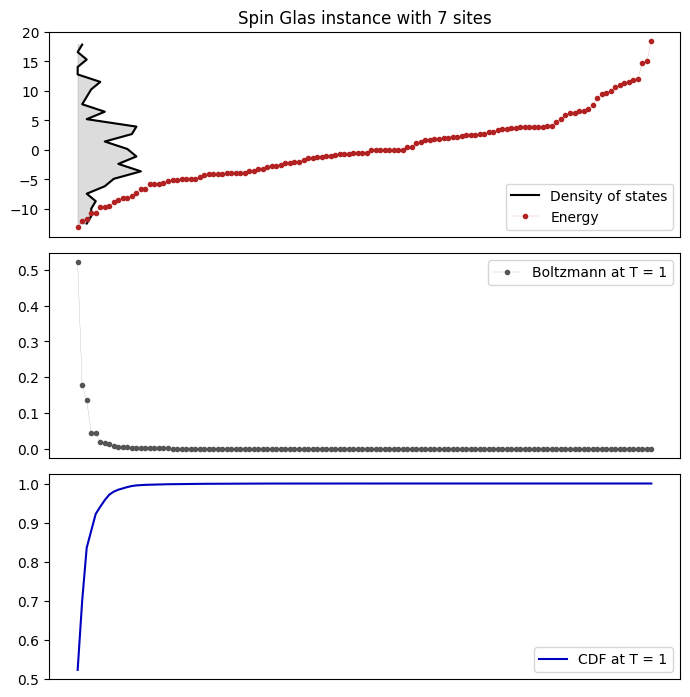

In [39]:
boltzmann_sorted = np.exp(-E_sorted / T) / sum(np.exp(-E_sorted / T))

plt.figure(figsize=(7,7))
plt.subplot(311)
plt.title(f'Spin Glas instance with {n} sites')
h,e = np.histogram(E_sorted, bins=25)
step = e[1] - e[0]
e_mids = e[:-1] + step/2
plt.plot(h, e_mids, color=black, label='Density of states')
plt.fill_betweenx(e_mids, h, color=grey, alpha=0.4)
plt.plot(x_sorted, E_sorted, '.--', linewidth=linewidth, color=red, label='Energy')

if show_ticks:
    plt.xticks(rotation=70)
else: 
    plt.xticks([])
plt.legend()

plt.subplot(312)
plt.plot(x_sorted, boltzmann_sorted, '.--', linewidth=linewidth, color=dark_grey, label=f'Boltzmann at T = {T}')
if show_ticks:
    plt.xticks(rotation=70)
else: 
    plt.xticks([])
# plt.ylim(-0.05, max(boltzmann_sorted)+0.1)
# plt.axhline(0, alpha=0.4, color=grey, zorder=-1)
plt.legend()

plt.subplot(313)
plt.plot(x_sorted, np.cumsum(boltzmann_sorted), label=f'CDF at T = {T}', color=blue)
if show_ticks:
    plt.xticks(rotation=70)
else: 
    plt.xticks([])
plt.legend()

plt.tight_layout()
plt.show()

Density of states is expected to be Gaussian. Hence, sorted energy values correspond to the Gaussian CDF.